In [1]:
pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importamos las librerias necesarias para la realización de nuestro EDA:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [4]:
df_cacao = pd.read_csv("flavors_of_cacao.csv")

In [5]:
# Visualizamos las primeras filas
df_cacao.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [6]:
# Limpiamos los nombres de las columnas
df_cacao.columns = df_cacao.columns.str.replace(r'\n', ' ', regex=True).str.strip().str.replace(' ', '_')

In [7]:
# Información del data set:
df_cacao.info()
df_cacao.shape
datos_faltantes = df_cacao.isnull().sum()
df_cacao.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company _(Maker-if_known)         1795 non-null   object 
 1   Specific_Bean_Origin_or_Bar_Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review_Date                       1795 non-null   int64  
 4   Cocoa_Percent                     1795 non-null   object 
 5   Company_Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean_Type                         1794 non-null   object 
 8   Broad_Bean_Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


,REF,Review_Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [23]:
# Convertimos la columna Cocoa_Percent en un número:
df_cacao["Cocoa_Percent"] = df_cacao["Cocoa_Percent"].astype(str).str.replace('%', '', regex=False)

In [ ]:
# Convertimos a Float:
df_cacao["Cocoa_Percent"] = pd.to_numeric(df_cacao["Cocoa_Percent"], errors="coerce")

In [25]:
print(df_cacao["Cocoa_Percent"].isna().sum()) 

1795


In [ ]:
# Nos aseguramos que haya quedado la variable de tipo Float:
print(df_cacao["Cocoa_Percent"].dtype)

float64


In [27]:
# Verificar los nuevos nombres
df_cacao.head()

,Company _(Maker-if_known),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,NaN,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,NaN,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,NaN,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,NaN,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,NaN,France,3.50,,Peru


In [9]:
print(df_cacao[["Broad_Bean_Origin", "Bean_Type"]].head(20))  

   Broad_Bean_Origin   Bean_Type
0           Sao Tome            
1               Togo            
2               Togo            
3               Togo            
4               Peru            
5          Venezuela     Criollo
6               Cuba            
7          Venezuela     Criollo
8          Venezuela     Criollo
9               Peru            
10            Panama            
11        Madagascar     Criollo
12            Brazil            
13           Ecuador            
14          Colombia            
15             Burma            
16  Papua New Guinea            
17         Venezuela  Trinitario
18              Peru            
19              Peru            


In [13]:
df_cacao.describe()

,REF,Review_Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


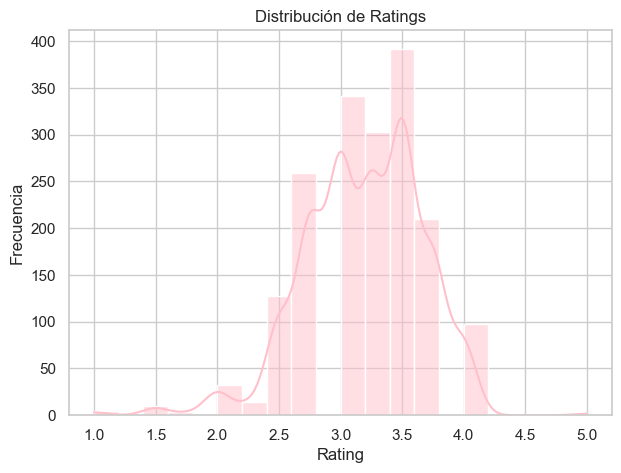

In [16]:
# Histograma Ratings:
plt.figure(figsize=(7, 5))
sns.histplot(df_cacao['Rating'], bins=20, kde=True, color="pink")
plt.title("Distribución de Ratings")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


### *Los chocolates entres 60% y 80% de cacao suelen recibir mejores calificaciones.*